In [1]:
import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

['d:\\Repositories\\PhD\\notebooks\\HHT', 'd:\\Anaconda\\envs\\ai-env-torch\\python310.zip', 'd:\\Anaconda\\envs\\ai-env-torch\\DLLs', 'd:\\Anaconda\\envs\\ai-env-torch\\lib', 'd:\\Anaconda\\envs\\ai-env-torch', '', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32\\lib', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\Pythonwin', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [2]:
import importlib

In [3]:
from hht_graphs import HHT, plot_imfs_compare, plot_instfreq_compare, plot_hilbert_scatter_compare, plot_hilbert_energy_map_compare, plot_marginal_spectrum_compare

In [4]:
hht = HHT(max_imfs=6, max_siftings=100, sd_thresh=0.2, envelope_bc='auto')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\EE_data\1730_case_edu.csv")

In [7]:
df

,DE,FE,fault_diameter,horse_power,rounds_per_minute,fault_end,samples_per_second,fault_element,fault
0,0.014603,0.192922,0,3,1730,0,12000,0,0
1,0.054449,0.164364,0,3,1730,0,12000,0,0
2,0.107646,0.090811,0,3,1730,0,12000,0,0
3,0.133722,0.086496,0,3,1730,0,12000,0,0
4,0.112652,0.099235,0,3,1730,0,12000,0,0
...,...,...,...,...,...,...,...,...,...
3528365,0.091857,0.155118,21,3,1730,2,48000,1,1
3528366,0.028101,-0.093087,21,3,1730,2,48000,1,1
3528367,-0.061238,-0.144956,21,3,1730,2,48000,1,1
3528368,0.079918,0.077803,21,3,1730,2,48000,1,1


In [9]:
x_healthy = df[df['fault'] == 0]['DE']
x_healthy

0         0.014603
1         0.054449
2         0.107646
3         0.133722
4         0.112652
            ...   
485638    0.035673
485639   -0.004590
485640   -0.023574
485641    0.005215
485642    0.047773
Name: DE, Length: 485643, dtype: float64

In [13]:
x_faulty = df[(df['fault'] == 1) & (df['fault_diameter'] == 7) & (df['fault_element'] == 2) & (df['fault_end'] == 1)]['DE']
x_faulty

485643    0.090314
485644    0.224973
485645   -0.108832
485646   -0.185338
485647    0.047918
            ...   
607194   -0.001949
607195    0.179816
607196    0.028589
607197   -0.159349
607198   -0.018355
Name: DE, Length: 121556, dtype: float64

In [ ]:
x_healthy = x_healthy[:1000]
x_faulty = x_faulty.reset_index(drop=True)[:1000]

0      0.090314
1      0.224973
2     -0.108832
3     -0.185338
4      0.047918
         ...   
995    0.209379
996    0.057340
997   -0.162435
998    0.042396
999    0.119065
Name: DE, Length: 1000, dtype: float64

In [16]:
import numpy as np

In [17]:
fs = df['samples_per_second'][0]  # Hz
N = 1000
t = np.arange(N) / fs

In [20]:
res_healthy = hht.transform(x_healthy, fs, t)
res_faulty = hht.transform(x_faulty, fs, t)

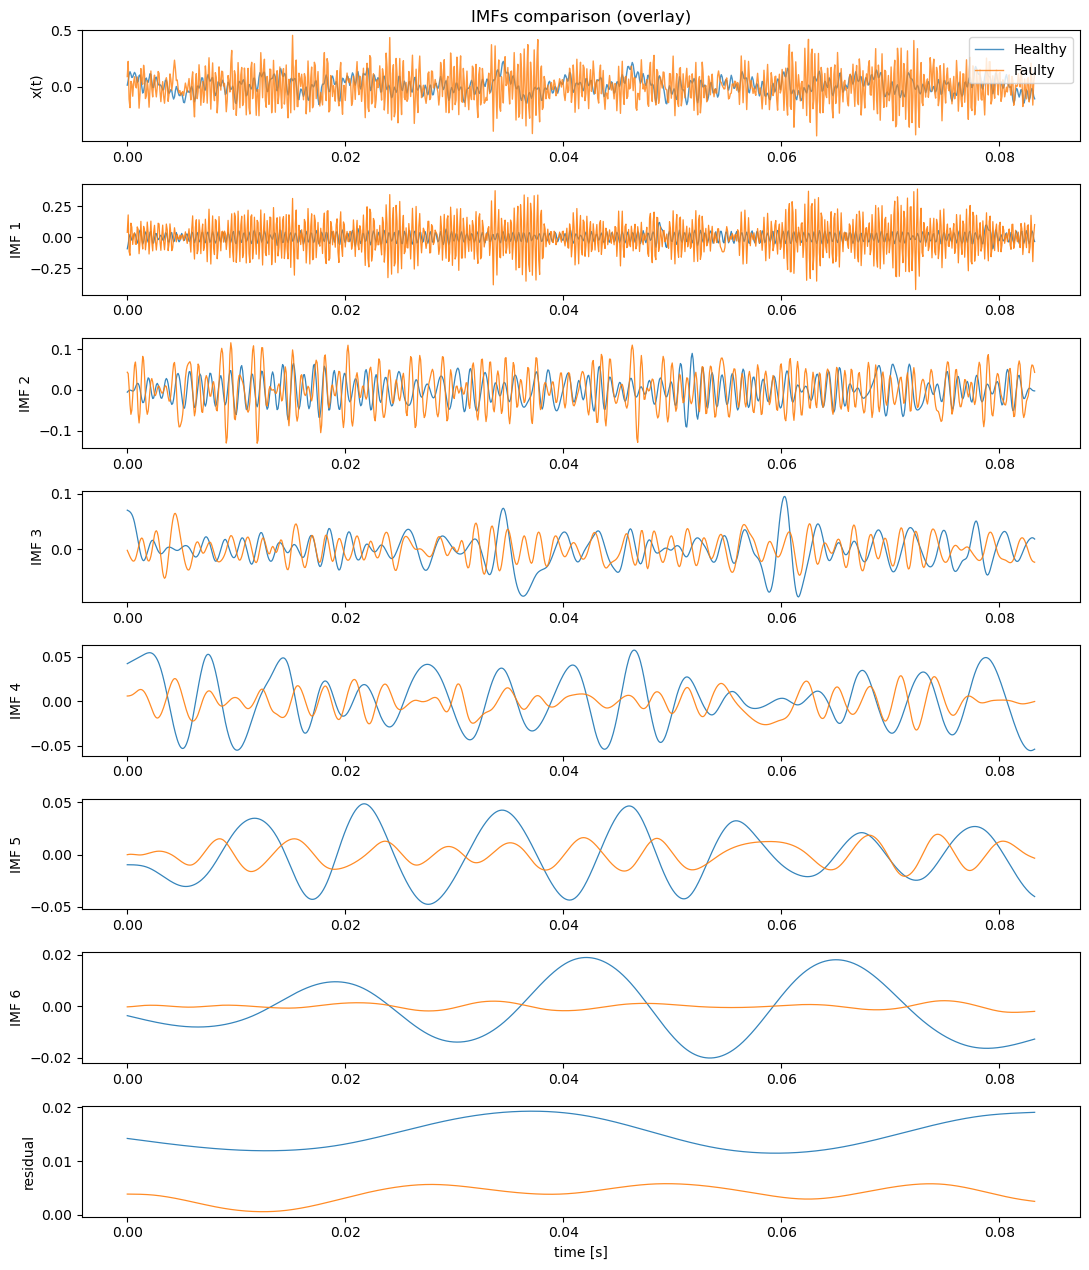

In [22]:
plot_imfs_compare(x_healthy, t, res_healthy['imfs'], res_healthy['residual'],
                  x_faulty, t, res_faulty['imfs'], res_faulty['residual'],
                  labels=("Healthy","Faulty"), title="IMFs comparison (overlay)")

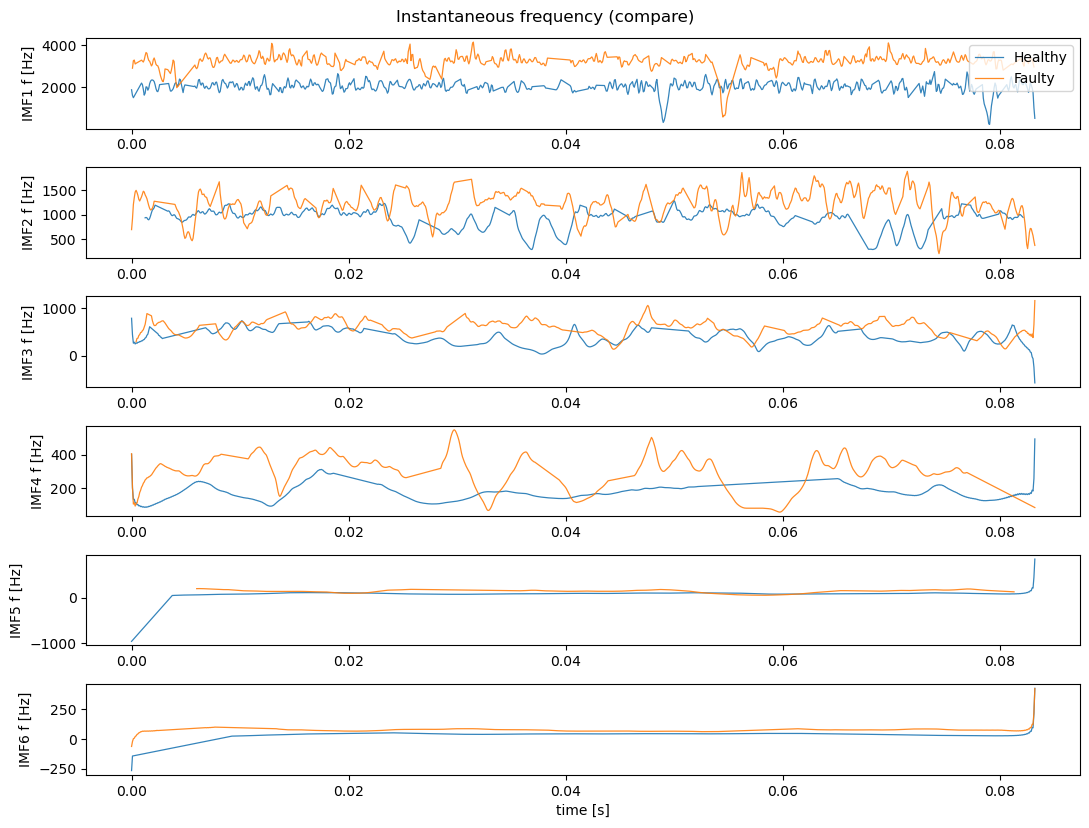

In [23]:
plot_instfreq_compare(t, res_healthy['frequency'], res_healthy['amplitude'],
                      t, res_faulty['frequency'], res_faulty['amplitude'],
                      fmax=None, labels=("Healthy","Faulty"),
                      title="Instantaneous frequency (compare)")

D:\Repositories\PhD\src\classes\hht_graphs.py:199: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


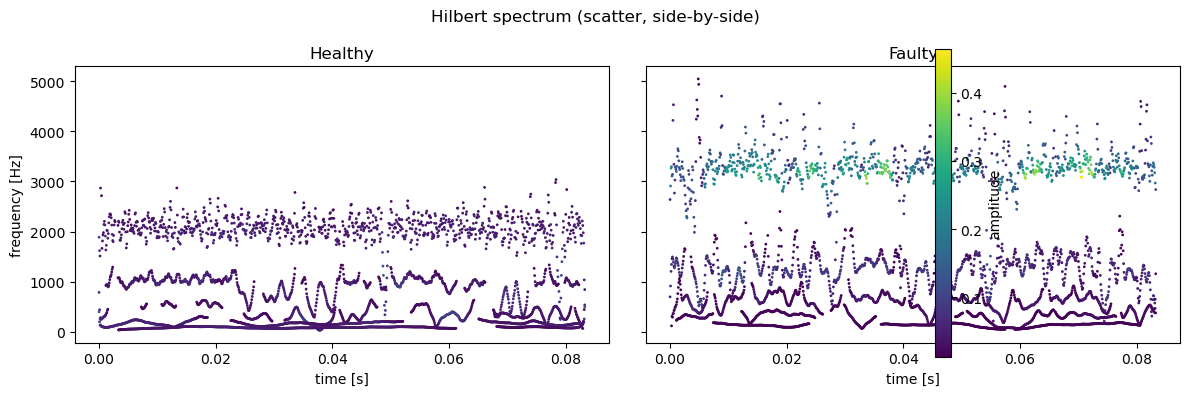

In [24]:
plot_hilbert_scatter_compare(t, res_healthy['frequency'], res_healthy['amplitude'],
                             t, res_faulty['frequency'], res_faulty['amplitude'],
                             fmax=None, amin_percentile=30,
                             labels=("Healthy","Faulty"),
                             title="Hilbert spectrum (scatter, side-by-side)")

D:\Repositories\PhD\src\classes\hht_graphs.py:260: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


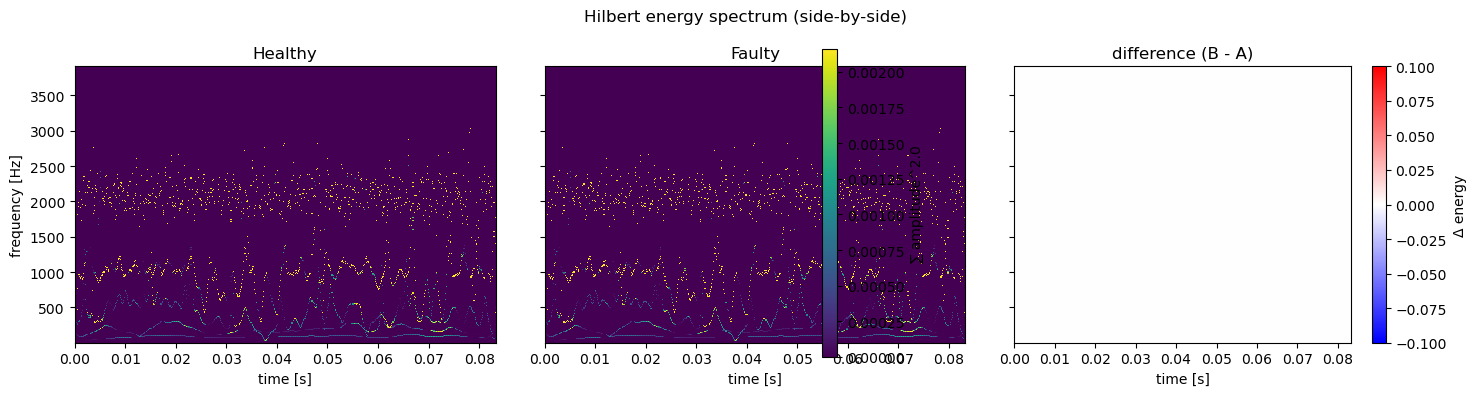

In [26]:
plot_hilbert_energy_map_compare(t, res_healthy['frequency'], res_faulty['amplitude'],
                                    t, res_healthy['frequency'], res_faulty['amplitude'],
                                    fmax=None, nbins_t=400, nbins_f=400, power=2.0,
                                    labels=("Healthy","Faulty"), show_diff=True,
                                    title="Hilbert energy spectrum (side-by-side)")

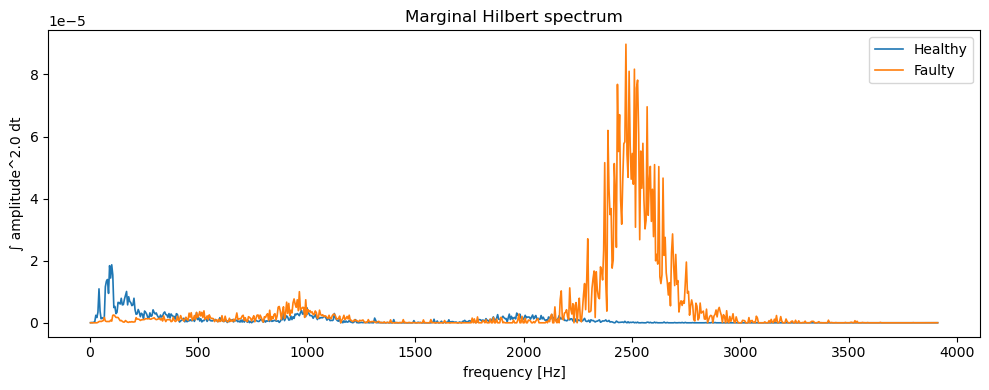

In [25]:
plot_marginal_spectrum_compare(res_healthy['frequency'], res_healthy['amplitude'], t,
                                res_faulty['frequency'], res_faulty['amplitude'], t,
                                fmax=None, nbins_f=800, power=2.0,
                                labels=("Healthy","Faulty"),
                                title="Marginal Hilbert spectrum")